In [1]:
import h5py
import datetime, os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pathlib import Path
from collections import defaultdict

import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Dropout, LeakyReLU


# Load the TensorBoard notebook extension
#%reload_ext tensorboard

# Settings

In [2]:
# set path to h5 file
DATAPATH = Path("/home/grionan1/project/tmds_mentor/data/processed/0.2_AG_final_df.h5")
REPORTPATH = Path("/home/grionan1/project/tmds_mentor/reports/")
MODELPATH = Path("/home/grionan1/project/tmds_mentor/models")

# Load Data

In [3]:
# read HDF5 file
f = h5py.File(DATAPATH, 'r')
# get each dataset and convert to pandas DataFrame
dset_x_train = pd.DataFrame(f['x_train'])
dset_y_train = pd.DataFrame(f['y_train'])
dset_x_test = pd.DataFrame(f['x_test'])
dset_y_test = pd.DataFrame(f['y_test'])

In [4]:
print(f'X train shape is:\t{dset_x_train.shape}')
print(f'y train shape is:\t{dset_y_train.shape}')
print(f'X test shape is:\t{dset_x_test.shape}')
print(f'y test shape is:\t{dset_y_test.shape}')

X train shape is:	(5100, 3949)
y train shape is:	(5100, 1)
X test shape is:	(900, 3949)
y test shape is:	(900, 1)


# Model Settings

In [5]:
input_shape = dset_x_train.shape[1]

In [7]:
model = Sequential([
    Input(shape=(input_shape,), name='somamers'),
    Dense(10, activation=None, kernel_initializer="glorot_uniform", name='dense_1'),
    BatchNormalization(name='batch_1'),
    Dropout(0.60, name='drop_1'),
    LeakyReLU(name='activation_1'),
    Dense(1, activation='sigmoid', name='output')
    ])

In [8]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [52]:
#logdir = os.path.join("/home/grionan1/project/tmds_mentor/logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
#tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)


my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=2, monitor="val_loss"),
#    tensorboard_callback
    ]

history = model.fit(
    dset_x_train, 
    dset_y_train, 
    #validation_data=(dset_x_test, dset_y_test),
    validation_split=0.2,
    epochs=25, 
    callbacks=my_callbacks
    )

Epoch 1/25
160/160 [==============================] - 1s 3ms/step - loss: 0.5846 - accuracy: 0.6883 - val_loss: 0.2485 - val_accuracy: 0.9911
Epoch 2/25
160/160 [==============================] - 0s 2ms/step - loss: 0.2200 - accuracy: 0.9586 - val_loss: 0.1174 - val_accuracy: 0.9867
Epoch 3/25
160/160 [==============================] - 0s 2ms/step - loss: 0.1588 - accuracy: 0.9677 - val_loss: 0.0504 - val_accuracy: 0.9944
Epoch 4/25
160/160 [==============================] - 0s 2ms/step - loss: 0.1024 - accuracy: 0.9871 - val_loss: 0.0389 - val_accuracy: 0.9933
Epoch 5/25
160/160 [==============================] - 0s 2ms/step - loss: 0.0951 - accuracy: 0.9787 - val_loss: 0.0239 - val_accuracy: 0.9967
Epoch 6/25
160/160 [==============================] - 0s 2ms/step - loss: 0.0863 - accuracy: 0.9813 - val_loss: 0.0200 - val_accuracy: 0.9989
Epoch 7/25
160/160 [==============================] - 0s 2ms/step - loss: 0.0747 - accuracy: 0.9856 - val_loss: 0.0144 - val_accuracy: 0.9989
Epoch 

# Plot Accuracy/Loss

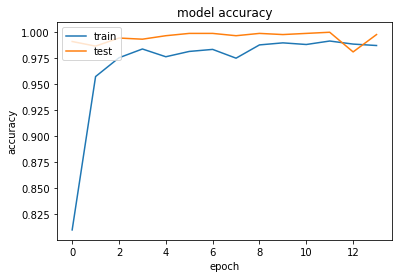

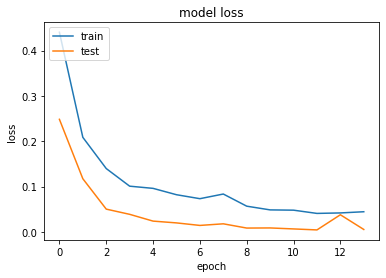

In [54]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig(REPORTPATH.joinpath("0.2_AG_accuracy.png"))
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig(REPORTPATH.joinpath("0.2_AG_loss.png"))

# Export Model

In [55]:
model.save(MODELPATH.joinpath('0.2_AG_model'))

INFO:tensorflow:Assets written to: /home/grionan1/project/tmds_mentor/models/0.2_AG_model/assets


## Validation

Get r2 values for predictions of the validation set.

In [56]:
from sklearn.metrics import r2_score

predicted = model.predict(dset_x_test)
r2_ = r2_score(dset_y_test, predicted)
print(r2_)

0.994841007579408
